# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre:

Identificación:

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [6]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

In [7]:
def Ridder(f, a, b, tol_1 = 1e-8, max_iter = 100):
  '''
  La siguiente función encuentra una raíz usando el método de Ridder
  Recibe: f: función
          a, b: Parámetros entre los cuales operará el método
          tol_1: Tolerancia máxima a la cual convergerá el método
          max_iter = Máximo de iteraciones para el cual el método para
  '''
  if f(a)*f(b)>0: #Si f(a) * f(b) > 0 entonces los 2 puntos son positivos, por tanto no se puede encontrar una raíz entre los dos con el método
    raise ValueError('El intervalo no es correcto') #Arroja error en este caso
  aproximaciones = [] #Se abre una lista vacía para guardar las aproximaciones
  for i in range(max_iter): #Empezamos el ciclo
    m = (a + b)/2 #Hallamos m
    f_a = f(a) #Evaluamos f(a), f(b) y f(m), los cuales se usarán para hallar s
    f_b = f(b)
    f_m = f(m)
    s = ((f_m**2)-(f_a*f_b))**0.5 #Se halla s para intentar hallar nuestra raíz
    if s == 0:
      raise ValueError('La raiź no puede estimarse en esta iteración') #Si s = 0 entonces el método se hace 0 en el denominador, por tanto arrojará error
    x = m + ((m-a)*f_m/s)*np.sign(f_a - f_b) #Se halla x con los parámetros anteriormente encontrados
    aproximaciones.append(x) #Se van guardando las posibles raíces en la anterior lista creada
    f_x = f(x) #Evaluamos f(x)
    if abs(f_x) < tol_1: #Si f(x) < tol_1 entonces habremos encontra la raíz
      return x, len(aproximaciones) #En caso de que hallemos la raíz, entonces la función nos devuelve x y el número de iteraciones que hizo para hallarla
    if abs(b - a) < tol_1: #O si el intervalo es más pequeño que la tolerancia entonces también habremos hallado la raíz
      return x, len(aproximaciones)
    if (f_m * f_x) < 0: #Si f(m) * f(x) es negativo entonces la raíz estará entre m y x
      a = m #Se trabaja sobre un nuevo intervalo
      b = x
    elif (f_a * f_x) < 0: #Si f(a) * f(x) es negativo entonces convertiremos los siguientes parámetros
      b = x
      f(b) == f(x)
    elif (f_b * f_x) < 0: #Si f(b) * f(x) es negativo entonces convertiremos los siguientes parámetros
      a = x
      f(a) == f(x)

In [58]:
#Hallamos la raíz con el método escrito y con newton y bisección para comparar
f = lambda x: np.cos(x) - x
a = 0
b = np.pi/2
raíz, aproximaciones = Ridder(f, a, b)
print(f'La raíz hallada es {raíz}')
print(f'El número de iteraciones aplicado en el método es {aproximaciones}')
raíz_bisección1 = bisect(f, 0, np.pi/2)
raíz_secante1 = newton(f, x0 = 0, x1 = np.pi/2)
print(f'La raíz hallada con el método de bisección es :{raíz_bisección1}')
print(f'La raíz hallada con el método de la secante es :{raíz_secante1}')
print('Veamos cuanta diferencia hay entre el resultado hallado por el método Ridder y el de la bisección:', raíz-raíz_bisección1)
print('Y la diferencia entre Ridder y secante es: ',raíz - raíz_secante1)
#La diferencia entre los métodos es infinitecimalmente pequeña, del orden de a la -12

La raíz hallada es 0.7390851332098146
El número de iteraciones aplicado en el método es 3
La raíz hallada con el método de bisección es :0.7390851332152737
La raíz hallada con el método de la secante es :0.7390851332151607
Veamos cuanta diferencia hay entre el resultado hallado por el método Ridder y el de la bisección: -5.459077634384357e-12
Y la diferencia entre Ridder y secante es:  -5.346056930477516e-12


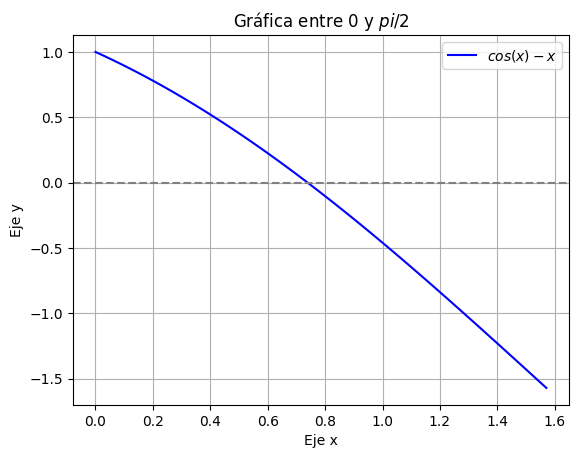

In [59]:
#gráfica de la función para 0 < x < pi/2
x = np.linspace(0, np.pi/2, 100)
y = f(x)
plt.plot(x, y, label = '$cos(x) - x$', color = 'blue')
plt.axhline(y = 0, color = 'grey', linestyle = '--')
plt.title('Gráfica entre $0$ y $pi/2$')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.grid()
plt.legend()
plt.show()

In [12]:
#Se crea el dataframe para filtrar las primeras aproximaciones a la raíz
df = pd.DataFrame({'x': x,'f(x)': f(x)})

print(df[(df['f(x)']<0.1) & (df['f(x)']>-0.1)])

           x      f(x)
43  0.682265  0.093881
44  0.698132  0.067913
45  0.713998  0.041751
46  0.729865  0.015399
47  0.745732 -0.011140
48  0.761598 -0.037864
49  0.777465 -0.064771
50  0.793331 -0.091857


$De la gráfica se puede concluir que entre más pequeña es la tolerancia, más iteraciones requiere el método para converger$


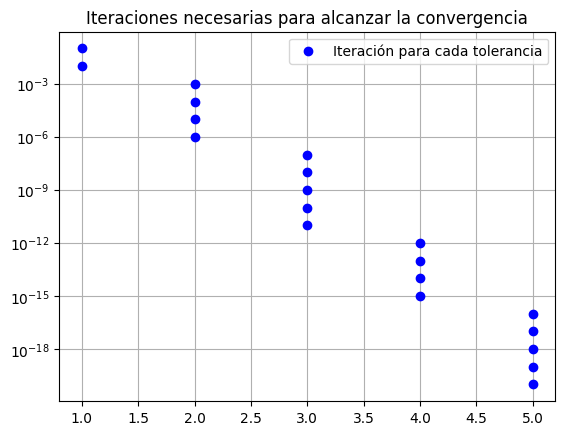

In [56]:
#Gráfica usando escala lograitmica
tol = np.logspace(-1, -20, 20)

iteraciones = []

for N in tol:
  _, N_iters = Ridder(f, a, b, N)
  iteraciones.append(N_iters)
plt.semilogy(iteraciones, tol, 'o', label=r'Iteración para cada tolerancia', color = 'blue')
plt.title('Iteraciones necesarias para alcanzar la convergencia')
plt.legend()
plt.grid()
#De la gráfica se puede concluir que entre más pequeña es la tolerancia, más iteraciones requiere el método para converger

#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





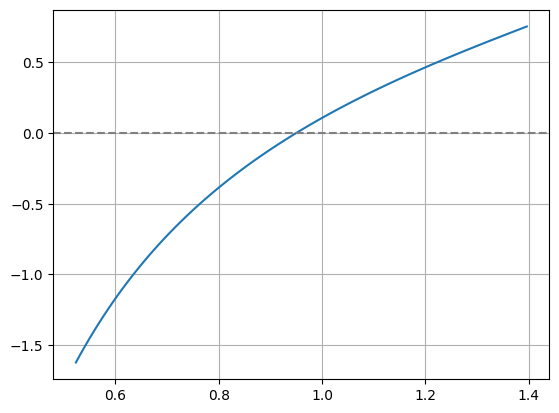

In [60]:
#Parte A
def Derivada_Ley_de_Snell(theta_i):
  '''
  La función recibe una sola variable ya que las demás ya están dadas
    Recibe: theta_i
    Devuelve: Derivada del ángulo de desviación total respecto al ángulo de incidencia
  '''
  A = np.deg2rad(60) #Se transforman los grados a radianes
  n = 1.52 #Se introducen los parámetros dados en el ejercicio
  theta_r = np.arccos(np.sin(theta_i/n)) #Se calcula theta_r con la fórmula dada en el ejercicio
  return 1 - ((np.cos(theta_i)*np.cos(A - theta_r))/(np.cos(theta_r)*(1 - (n**2) * (np.sin(A - theta_r)**2))**0.5))
theta_i = np.linspace(np.deg2rad(30), np.deg2rad(80), 100) #Se crean distintos valores para theta_i entre 30 y 80 grados
df_dtheta = Derivada_Ley_de_Snell(theta_i) #Se introduce la derivada con distintos valores de theta_i en una variable
plt.plot(theta_i, df_dtheta) #Se grafica theta_i contra la derivada para hallar el ángulo de desviación mínimo
plt.axhline(y = 0, color = 'grey', linestyle = '--')
plt.grid()
plt.show()
#El ángulo está entre 0.8 y 1

In [4]:
theta0 = np.deg2rad(30)

# Aplicar Newton para encontrar el mínimo
theta_min = newton(Derivada_Ley_de_Snell, theta0)

print(f'Ángulo de incidencia que produce desviación mínima: {theta_min:.4f}')


Ángulo de incidencia que produce desviación mínima: 0.8633


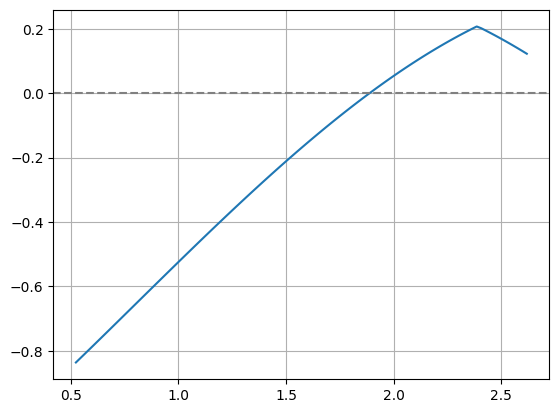

In [18]:
#Para encontrar el ángulo critico la ecuación se debe cumplir, por tanto la igualamos a cero y la definimos
def f(theta_i):
  A = np.deg2rad(60)
  n = 1.52
  theta_r = np.arccos(np.sin(theta_i/n))
  return np.sin(A - theta_r) - (1/n)
#Grafiquemos para saber en qué intervalo está la raíz
theta_i = np.linspace(np.deg2rad(30), np.deg2rad(150), 100)
plt.plot(theta_i, f(theta_i))
plt.axhline(y = 0, color = 'grey', linestyle = '--')
plt.grid()

In [12]:
#Ahora sabemos que la raíz está entre 1.5 y 2.0, evaluemos por bisección entre este intervalo
raíz_bisección2 = bisect(f, 1.5, 2.5)
print(raíz_bisección2)

1.8872604011939984


In [19]:
#Ángulo de incidencia convertido a grados
Ángulo_de_incidencia = np.rad2deg(raíz_bisección2)
print(Ángulo_de_incidencia)

108.13205583058262
